<a href="https://colab.research.google.com/github/PedroJuiz/SupervisedLearning/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import HTML
HTML("\n".join(open('mioti_style.css', 'r').readlines()))

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>
# Challenge S2: Reconocimiento de dígitos

## Objetivo

Nuestro objetivo en este challenge es implementar un mecanismo automático que a partir de una imagen de un cheque sea capaz de reconocer la cantidad manuscrita que hay en el mismo.

<img src="cheque.jpg">

Para ello trabajaremos con un dataset abierto denominado `digits` que contiene dígitos manuscritos etiquetados.

## Configuración del entorno

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

## Carga de datos

En esta ocasión vamos a utilizar una dataset denominado 'digits' que contiene imágenes de números manuscritos.

Este dataset está disponible dentro de los datasets de `sklearn` y podemos cargarlo en memoria de la siguiente manera:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

Inspeccionando el dataset podemos ver que es un diccionario. Vamos a navegar un poco en sus propiedades:

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

En la etiqueta `DESCR` tenemos la descripción del dataset:

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Podemos ver que en la variable `data` están almacenados los datos.

In [ ]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
print(digits.data.shape)

(1797, 64)


Y viendo su estructura, concluimos que contiene $1797$ instancias, cada una contiene $64$ características.

Además hay un vector:

In [ ]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
print(len(digits.target))

1797


In [ ]:
print(digits.target.shape)

(1797,)


Que contiene la clase real de cada instancia.

Tambien disponemos de las imagenes sin "aplanar". Pero para el entrenamiento y las predicciones usamos las imagenes "aplanadas".

In [ ]:
print (digits.images.shape)

(1797, 8, 8)


Para estar seguros de que estamos interpretando el dataset podemos dibujarlo de la siguiente manera:

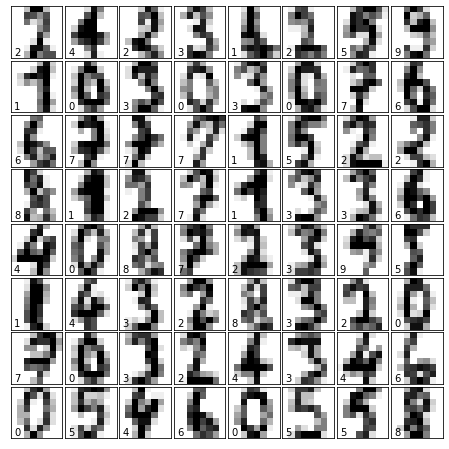

In [ ]:
import random

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

random.seed(42)
for i in range(64):
    pos = random.randint(0, len(digits.images) - 1)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[pos], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[pos]))

In [ ]:
print("Valor maximo de codificacion de los pixeles: ",np.max(digits.data))
print("Valor minimo de codificacion de los pixeles: ",np.min(digits.data))

Valor maximo de codificacion de los pixeles:  16.0
Valor minimo de codificacion de los pixeles:  0.0


## Conjunto de entrenamiento y test

Divide el conjunto de datos en 2 grupos: entrenamiento y test con una proporción de reparto del 30% (70% entrenamiento, 30% test)

* ¿Cuántos elementos tiene el conjunto de entrenamiento? ¿Y el de test?

In [ ]:
from sklearn.model_selection import train_test_split
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [ ]:
lon_train = len(X_train)
lon_test = len(X_test)

print(f'Longitud de conjunto train: {lon_train}\nLongitud de conjunto test: {lon_test}')

Longitud de conjunto train: 1257
Longitud de conjunto test: 540


## Clasificador logístico

Entrena un clasificador logístico para reconocer digitos.

* ¿Qué porcentaje de acierto obtienes?
* ¿Cuales son las clases que más se equivocan entre sí? ¿son lógicos los resultados?

In [ ]:
#Creacion y entrenamiento del modelo
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Prediccion con el modelo entrenado
prediction = modelo_logistico.predict(X_test)

In [ ]:
prediction

array([3, 3, 4, 4, 1, 3, 1, 0, 7, 4, 0, 0, 5, 1, 6, 0, 3, 1, 0, 6, 9, 7,
       7, 5, 4, 7, 7, 0, 0, 9, 1, 6, 8, 6, 8, 4, 6, 2, 1, 6, 0, 6, 2, 0,
       2, 3, 7, 8, 8, 1, 2, 8, 6, 5, 1, 6, 4, 6, 0, 4, 3, 5, 6, 2, 8, 8,
       1, 2, 0, 1, 7, 9, 4, 7, 3, 9, 4, 3, 3, 1, 9, 5, 4, 6, 1, 2, 4, 2,
       4, 5, 8, 4, 1, 7, 6, 7, 5, 5, 1, 3, 9, 4, 6, 6, 8, 1, 7, 5, 6, 4,
       9, 8, 7, 0, 9, 0, 2, 9, 0, 5, 1, 4, 4, 2, 2, 0, 7, 3, 6, 8, 2, 5,
       2, 3, 3, 9, 6, 7, 4, 0, 7, 3, 2, 2, 2, 3, 8, 1, 7, 1, 5, 7, 9, 1,
       3, 2, 6, 0, 7, 9, 6, 0, 2, 6, 3, 1, 5, 9, 9, 6, 1, 8, 6, 1, 3, 4,
       4, 2, 0, 5, 9, 0, 7, 0, 7, 5, 8, 4, 8, 8, 3, 7, 9, 8, 2, 0, 3, 4,
       9, 4, 1, 8, 7, 0, 5, 4, 5, 2, 2, 1, 4, 2, 0, 8, 7, 3, 2, 9, 2, 3,
       8, 0, 6, 0, 2, 8, 7, 5, 4, 8, 0, 1, 5, 5, 0, 9, 8, 7, 7, 1, 4, 2,
       4, 7, 1, 3, 0, 8, 2, 8, 6, 6, 3, 5, 6, 4, 5, 4, 6, 5, 7, 7, 9, 9,
       1, 0, 4, 6, 1, 7, 3, 9, 8, 1, 0, 4, 9, 5, 8, 2, 5, 8, 4, 0, 8, 3,
       1, 6, 6, 4, 6, 1, 4, 6, 6, 4, 1, 5, 3, 0, 1,

In [ ]:
#Valores obtenidos de la recta de regresión
print(modelo_logistico.coef_)
print(modelo_logistico.intercept_)

[[ 0.00000000e+00  4.19639696e-03  1.07253922e-02  1.23186499e-01
   7.63398326e-03 -7.66378666e-02 -8.10529583e-02 -1.44322782e-02
  -1.07770642e-04 -3.64793918e-03 -1.06166500e-02  1.25515945e-01
   7.30203789e-02  1.18365107e-01 -3.73730378e-02 -1.51075465e-02
  -1.49543298e-03  4.58816171e-02  1.26913772e-01 -1.89987306e-02
  -3.07711299e-01  1.28837128e-01  4.30273226e-02 -4.93407181e-03
  -7.47661420e-04  1.27173477e-01  4.96021837e-02 -1.15514631e-01
  -3.97357147e-01  1.36854476e-02  8.58439228e-02 -3.62858989e-05
   0.00000000e+00  1.65909524e-01  4.23108292e-02 -2.13013727e-01
  -3.86863329e-01  3.23684420e-02  7.77801529e-02  0.00000000e+00
  -1.33453676e-04 -1.03762091e-02  2.34986349e-01 -1.01479485e-01
  -1.48639080e-01  1.00657527e-01  4.63939282e-02 -3.35501467e-04
  -5.20346067e-05 -8.17557058e-02  6.34162247e-02 -2.43079517e-02
   1.51457637e-01  6.61049777e-02 -2.95081824e-02 -9.18443794e-03
  -1.33461867e-05 -1.70958721e-03 -3.41634130e-02  1.26028097e-01
  -2.89808

In [ ]:
print(prediction)
print(y_test)

[3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6 9 7 7 5 4 7 7 0 0 9 1 6 8 6 8 4 6
 2 1 6 0 6 2 0 2 3 7 8 8 1 2 8 6 5 1 6 4 6 0 4 3 5 6 2 8 8 1 2 0 1 7 9 4 7
 3 9 4 3 3 1 9 5 4 6 1 2 4 2 4 5 8 4 1 7 6 7 5 5 1 3 9 4 6 6 8 1 7 5 6 4 9
 8 7 0 9 0 2 9 0 5 1 4 4 2 2 0 7 3 6 8 2 5 2 3 3 9 6 7 4 0 7 3 2 2 2 3 8 1
 7 1 5 7 9 1 3 2 6 0 7 9 6 0 2 6 3 1 5 9 9 6 1 8 6 1 3 4 4 2 0 5 9 0 7 0 7
 5 8 4 8 8 3 7 9 8 2 0 3 4 9 4 1 8 7 0 5 4 5 2 2 1 4 2 0 8 7 3 2 9 2 3 8 0
 6 0 2 8 7 5 4 8 0 1 5 5 0 9 8 7 7 1 4 2 4 7 1 3 0 8 2 8 6 6 3 5 6 4 5 4 6
 5 7 7 9 9 1 0 4 6 1 7 3 9 8 1 0 4 9 5 8 2 5 8 4 0 8 3 1 6 6 4 6 1 4 6 6 4
 1 5 3 0 1 6 0 2 5 5 8 8 2 6 0 1 1 5 1 6 9 2 8 2 4 9 8 3 3 3 2 4 0 9 4 3 6
 0 2 1 3 3 2 5 9 0 7 5 9 7 6 4 7 9 6 7 4 1 5 9 6 5 5 0 8 9 3 2 7 9 7 5 7 1
 8 7 5 5 8 4 1 0 0 8 3 0 9 2 9 1 0 0 6 9 0 7 1 4 7 1 0 4 1 4 8 0 2 5 4 2 3
 9 7 0 6 7 5 0 8 5 3 4 2 6 4 1 4 3 8 8 4 3 9 6 0 9 7 5 9 4 9 9 1 9 5 7 8 6
 9 1 0 5 5 9 7 3 1 8 7 7 2 8 0 2 5 0 2 4 6 1 4 0 1 7 5 2 1 0 9 4 9 3 2 3 8
 7 0 2 1 1 9 7 1 6 3 5 7 

## Métricas de evaluación (Accuracy)

In [ ]:
np.mean(prediction == y_test)

0.9666666666666667

In [ ]:
print(modelo_logistico.score(X_test, y_test))

0.9666666666666667


Obtenemos que un 96% de las instancias han obtenido los valores correctos o esperados

## Matriz de confusión

In [ ]:
confusion_matrix(y_test, prediction)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  2,  0,  3],
       [ 0,  1,  0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  4,  0,  0,  1,  0,  0,  0, 43,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2, 50]], dtype=int64)

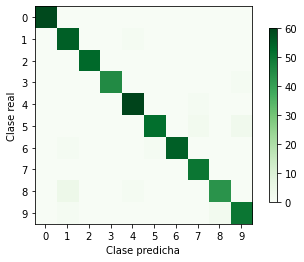

In [ ]:
plt.imshow(confusion_matrix(y_test, prediction), cmap="Greens")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

## Perceptrón multicapa

Entrena un perceptrón multicapa con los datos anteriores (revisa el worksheet si no te acuerdas de como hacerlo).

* ¿Qué porcentaje de acierto obtienes?
* ¿Cuales son las clases que más se equivocan entre sí?
* Compara los resultados del perceptrón y el logístico

## Perceptron multicapa con scikit-learn

In [ ]:
from sklearn.neural_network import MLPClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

In [ ]:
#Entrenamos el modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 5.46788364
Iteration 2, loss = 3.09050254
Iteration 3, loss = 1.89174663
Iteration 4, loss = 1.14546972
Iteration 5, loss = 0.80389827
Iteration 6, loss = 0.58952346
Iteration 7, loss = 0.46558363
Iteration 8, loss = 0.38654951
Iteration 9, loss = 0.32468646
Iteration 10, loss = 0.28262342
Iteration 11, loss = 0.24493002
Iteration 12, loss = 0.21741747
Iteration 13, loss = 0.19191937
Iteration 14, loss = 0.17029852
Iteration 15, loss = 0.15463510
Iteration 16, loss = 0.13738079
Iteration 17, loss = 0.12471559
Iteration 18, loss = 0.11435136
Iteration 19, loss = 0.10710452
Iteration 20, loss = 0.09580481
Iteration 21, loss = 0.08933954
Iteration 22, loss = 0.08318893
Iteration 23, loss = 0.07672646
Iteration 24, loss = 0.07247598
Iteration 25, loss = 0.06747864
Iteration 26, loss = 0.06242479
Iteration 27, loss = 0.05844282
Iteration 28, loss = 0.05404366
Iteration 29, loss = 0.05113789
Iteration 30, loss = 0.04848278
Iteration 31, loss = 0.04574256
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

In [ ]:
# Hacemos predicciones con los datos de test
y_pred = mlp.predict(X_test)

## Evaluación del modelo

In [ ]:
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9703703703703703


## Matriz de confusión

In [ ]:
confusion_matrix(y_test, y_pred)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  1, 51,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  2,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 50]], dtype=int64)

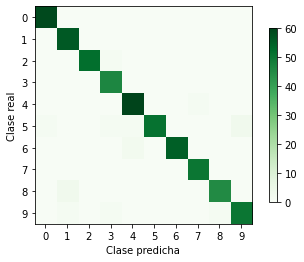

In [ ]:
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Greens")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

Podemos observar que ante nuestro conjunto de datos, el perceptron multicapa se comporta ligeramente mejor, en relación al accuracy, que el modelo de clasificación logística.

Observando los resultados de la matriz de confusión, observamos que las clases que son más propensas a confundirse entre sí son la 8 con la 1, la 8 con la 7 y la 5 con la 9

## Análisis de resultados

Analiza con más detalle los resultados del perceptrón.

* ¿Podrías dibujar los casos en los que se equivoca?.
* Revisando los casos que se equivoca... ¿podrías identificar casos que son outliers? (casos que se equivoca pero es lógico porque no están bien etiquetados en el dataset original)

Tip: Apoyate en la función `dibuja_digito`.

In [ ]:
def dibuja_digito(index, data_feature, real_class, predicted_class):
    fig = plt.figure(figsize=(2, 2))
    plt.imshow(data_feature.reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    plt.text(10, 5, "Index: " + str(index))
    plt.text(10, 6, "Real: " + str(real_class))
    plt.text(10, 7, "Predicted: " + str(predicted_class))

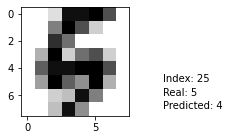

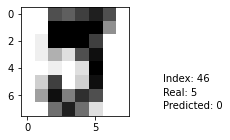

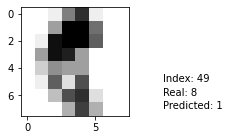

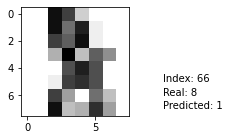

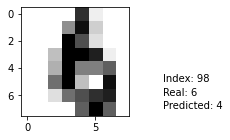

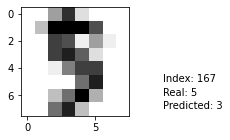

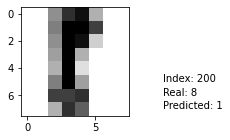

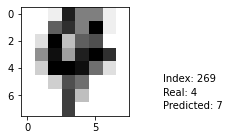

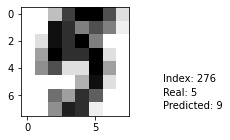

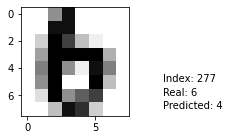

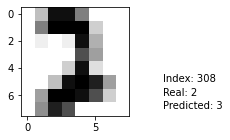

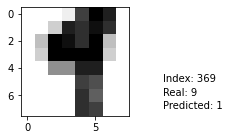

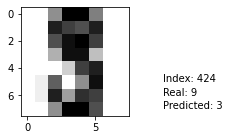

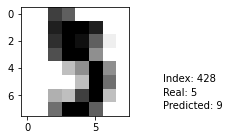

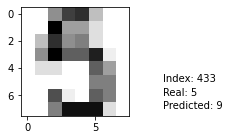

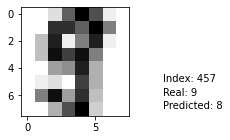

In [ ]:
errores = np.where(y_test != y_pred)[0]

for i in errores:
    dibuja_digito(i, X_test[i], y_test[i], y_pred[i])

Bajo mi percepción, tomaría como outliers los index 49, 200, 424, 435

In [ ]:
index_to_drop = [49, 200, 424, 435]

## Eliminación de outliers

Elimina los outliers del dataset de test, vuelve a entrenar la red neuronal con un random seed aleatorio y comprueba los resultados con el nuevo dataset de test reducido.

    * Analiza los resultados
    * ¿Es correcto lo que hemos hecho?
    * ¿Que crees que sucedería si eliminasemos tambien los outliers del dataset de entrenamiento?. ¿Mejorarian los resultados?. Solo elabora una respuesta, no es necesario implementar esto en codigo.


In [ ]:
no_outliers = [x for i, x in enumerate(y_test) if i not in index_to_drop]
no_outliers_X = [x for i, x in enumerate(X_test) if i not in index_to_drop]

In [ ]:
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

In [ ]:
#Entrenamos el modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 5.72682695
Iteration 2, loss = 2.92347507
Iteration 3, loss = 1.75411286
Iteration 4, loss = 1.05157738
Iteration 5, loss = 0.70458138
Iteration 6, loss = 0.51006396
Iteration 7, loss = 0.39630128
Iteration 8, loss = 0.32051061
Iteration 9, loss = 0.26937314
Iteration 10, loss = 0.22892933
Iteration 11, loss = 0.20108418
Iteration 12, loss = 0.17547147
Iteration 13, loss = 0.15627050
Iteration 14, loss = 0.13833492
Iteration 15, loss = 0.12760946
Iteration 16, loss = 0.11835457
Iteration 17, loss = 0.10677586
Iteration 18, loss = 0.09787984
Iteration 19, loss = 0.09009294
Iteration 20, loss = 0.08322817
Iteration 21, loss = 0.07652079
Iteration 22, loss = 0.07188752
Iteration 23, loss = 0.06722550
Iteration 24, loss = 0.06224465
Iteration 25, loss = 0.05951481
Iteration 26, loss = 0.05509643
Iteration 27, loss = 0.05091302
Iteration 28, loss = 0.04851161
Iteration 29, loss = 0.04689629
Iteration 30, loss = 0.04261432
Iteration 31, loss = 0.04103901
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

In [ ]:
# Hacemos predicciones con los datos de test
y_pred = mlp.predict(no_outliers_X)

In [ ]:
accuracy = mlp.score(no_outliers_X, no_outliers)
print("Accuracy:", accuracy)

Accuracy: 0.9869402985074627


Observamos que el accuracy del modelo mejora hasta convertirse practicamente en un modelo perfecto, con un accuracy de 98,6%

En caso de eliminar los outliers en el conjunto de train, podría tener un impacto tanto positivo como negativo, ya que podría mejorar evitando que el modelo aprenda patrones erróneos, pero también podría reducir la capacidad del modelo para generalizar y predecir datos futuros.

## (Extra) Evalúa tus propias imágenes con el modelo entrenado

Genera una imagen de 32x32 píxels y escribe un número en ella. A continuación reconócelo con el mejor modelo que hayas
obtenido en los pasos anteriores.

Recuerda que en la descripción del dataset se especifica como deben ser los números de entrada:

* Imágenes de 8x8 con valores en escala de grises entre 0 y 16
* Número en blanco sobre un fondo negro.

Por último:

* Evalua los resultados obtenidos. ¿cómo podríamos mejorarlos?

In [ ]:
from skimage import data, io, filters
img = io.imread("tu_digito.png")

In [ ]:
io.imshow(img)
io.show()